# Natural Language Processing with Disaster Tweets

Importing all packages

In [553]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re


Reading data from files (test and train)

In [554]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

Example data

In [555]:
df_train



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [556]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Number of all records

In [557]:
df_train['id'].count()

7613

In [558]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


Count and graph of non-disaster/disaster tweets

In [559]:
df_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

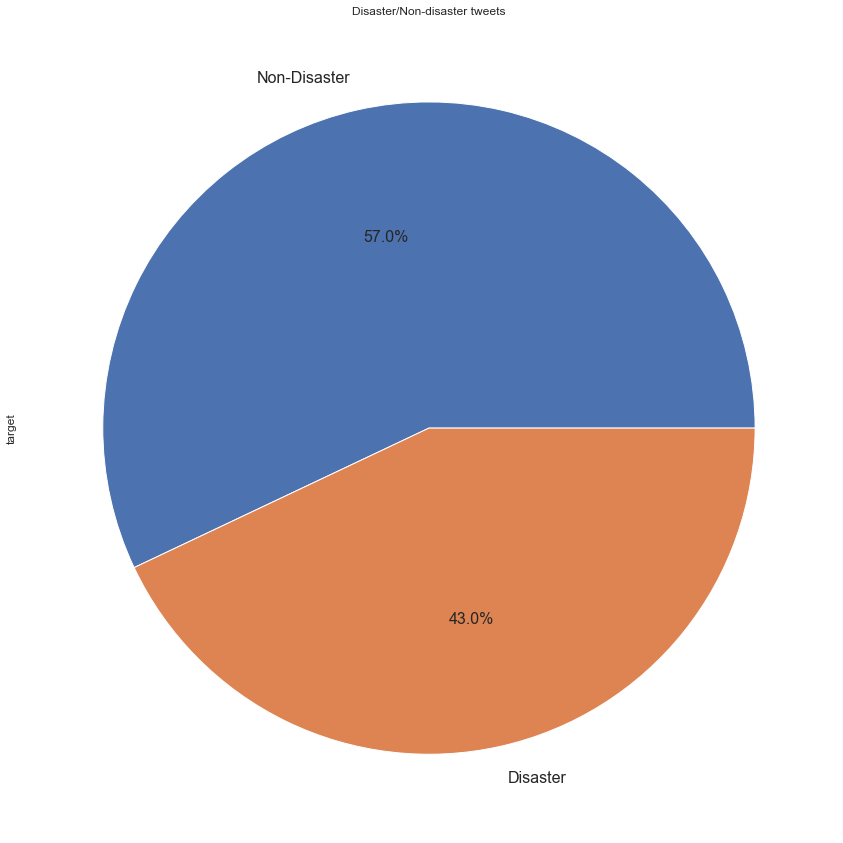

In [560]:
df_train['target'].value_counts().plot(kind='pie',
                                         title='Disaster/Non-disaster tweets', 
                                         autopct='%1.1f%%',
                                         shadow=False,
                                         labels=['Non-Disaster', 'Disaster'],
                                         legend = False, fontsize=16, figsize=(15,15))
plt.show()

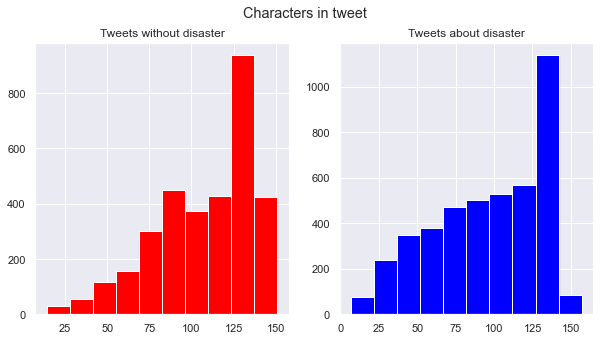

In [561]:
fig, (ax1, ax2)=plt.subplots(1,2,figsize = (10,5))
disaster_tweets_len = df_train[df_train['target']==1]['text'].str.len()
ax1.hist(disaster_tweets_len, color = 'red')
ax1.set_title('Tweets without disaster')

notdisaster_tweets_len = df_train[df_train['target']==0]['text'].str.len()
ax2.hist(notdisaster_tweets_len, color = 'blue')
ax2.set_title('Tweets about disaster')

fig.suptitle('Characters in tweet')
plt.show()

List of the most occurring words in keyboard (general)

In [562]:
df_train.keyword.value_counts().sort_values(ascending=False)

fatalities               45
armageddon               42
deluge                   42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

List of the most occurring words in keyboard (only in disaster tweets)

In [563]:
df_train_true_key = df_train[df_train['target'] == 1].keyword.value_counts().sort_values(ascending=False)
df_train_true_key

derailment     39
outbreak       39
wreckage       39
debris         37
typhoon        37
               ..
blazing         1
epicentre       1
body%20bag      1
electrocute     1
ruin            1
Name: keyword, Length: 220, dtype: int64

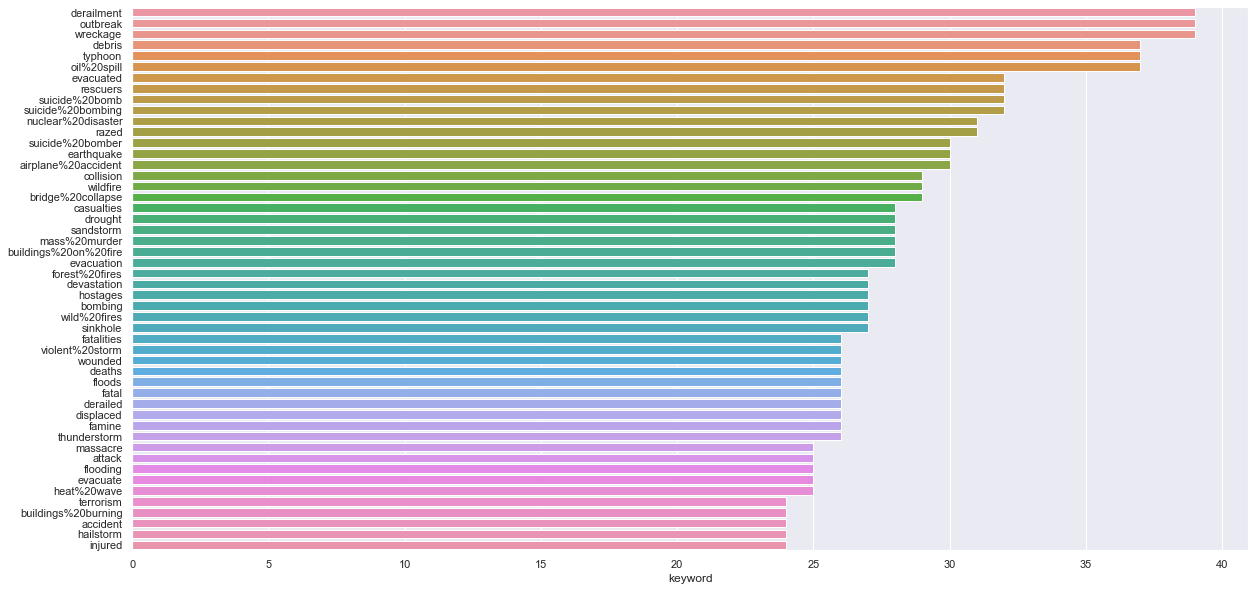

In [564]:
sns.barplot(y = df_train_true_key.index[:50], x = df_train_true_key[:50])
sns.set(rc={'figure.figsize':(20, 10)})

# Cleaning data



removing all links from our data

In [565]:
ex = df_train.iloc[40,3]
ex

'Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw'

In [566]:
def delete_links(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [567]:
df_train['text'] = df_train['text'].apply(lambda sentence: delete_links(sentence))

In [568]:
ex = df_train.iloc[40,3]
ex

'Check these out:     #nsfw'